<a href="https://colab.research.google.com/github/SumLama/DemoRepo/blob/main/waterPortabilitytesting/waterpotabilitytesting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from scipy.stats import randint

In [ ]:
df = pd.read_csv('water_potability.csv')

In [ ]:
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [ ]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [ ]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

<Axes: >

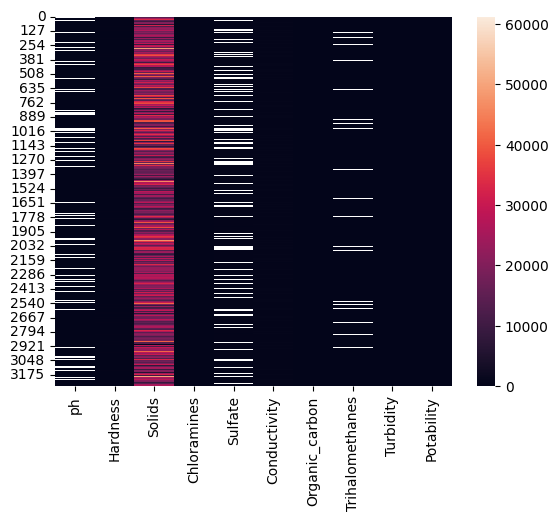

In [ ]:
sns.heatmap(df)

# The above heatmap indicated the ph-value columns, sulfate and trihalomethanes has some missing values

In [ ]:
#Fill missing value with median so that itwillnot get affected by the presence of outliers.
df.fillna(df.median(),inplace=True)


In [ ]:
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

# There is no storng relationship between column, we cannot exclude any columns

In [ ]:
# CHeck the potability counts
df.Potability.value_counts()

Potability
0    1998
1    1278
Name: count, dtype: int64

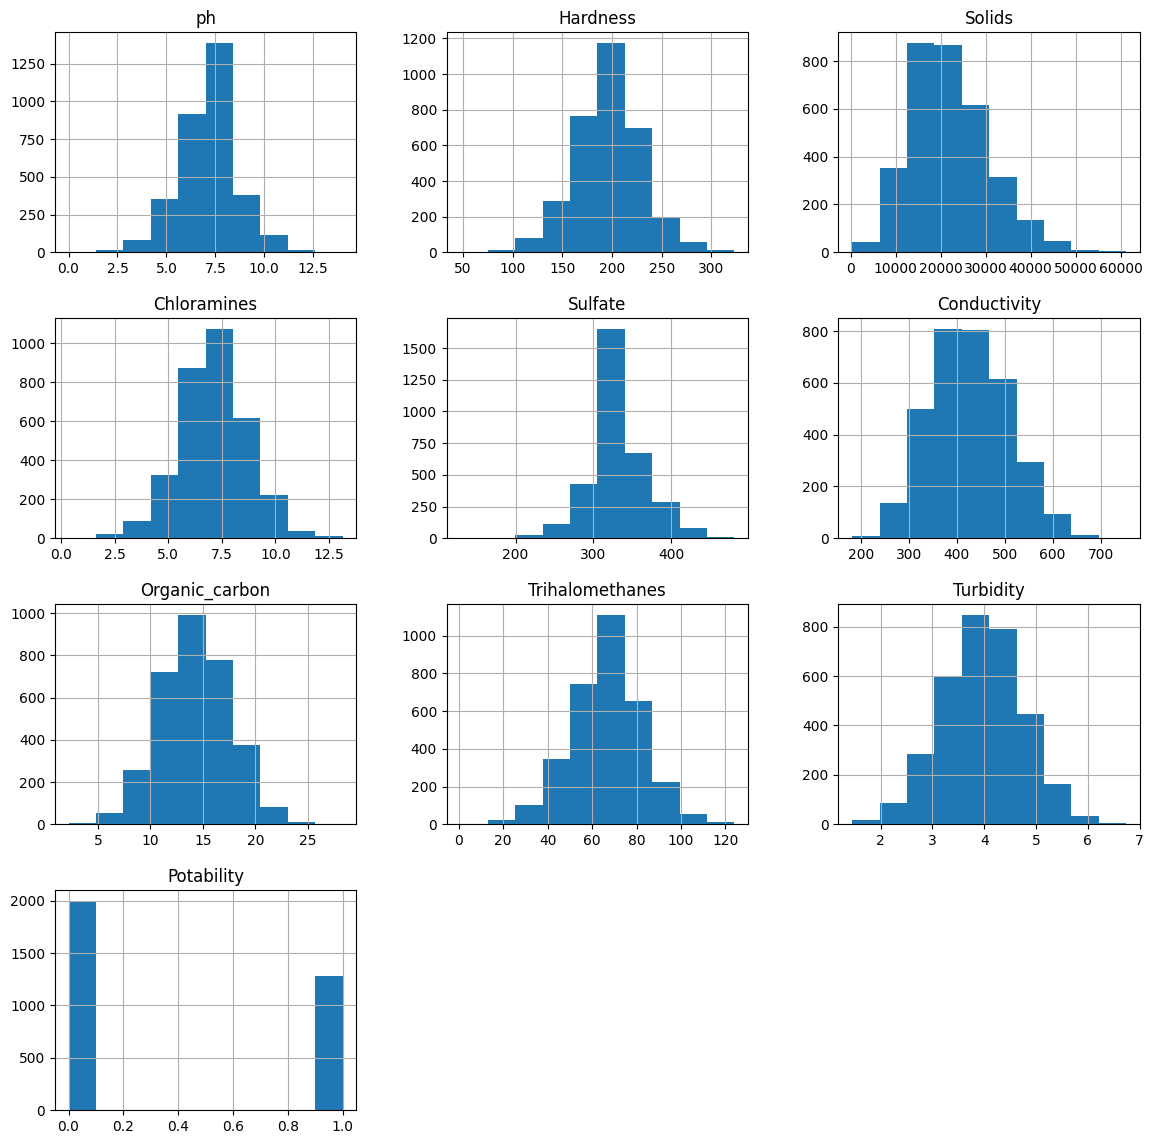

In [ ]:
df.hist(figsize=(14,14))
plt.show()

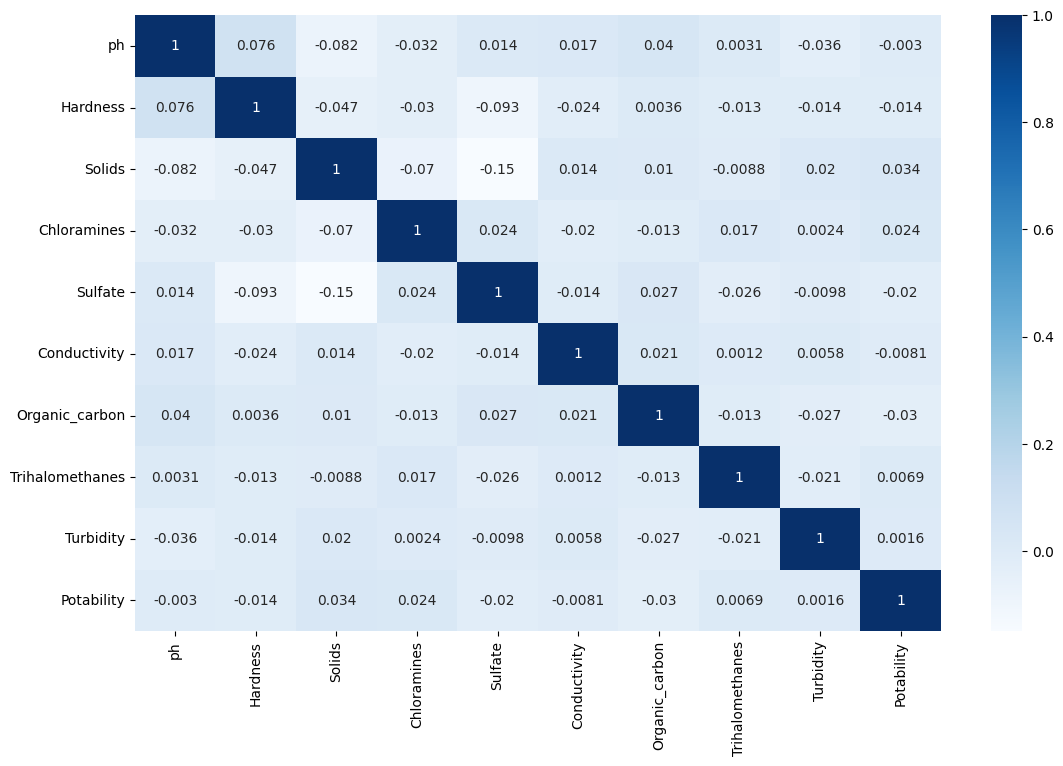

In [ ]:
plt.figure(figsize = (13,8))
sns.heatmap(df.corr(),annot=True,cmap='Blues')
plt.show()

# There is no relationship between the columns so we cannot reduce the dimension

# To check outliers

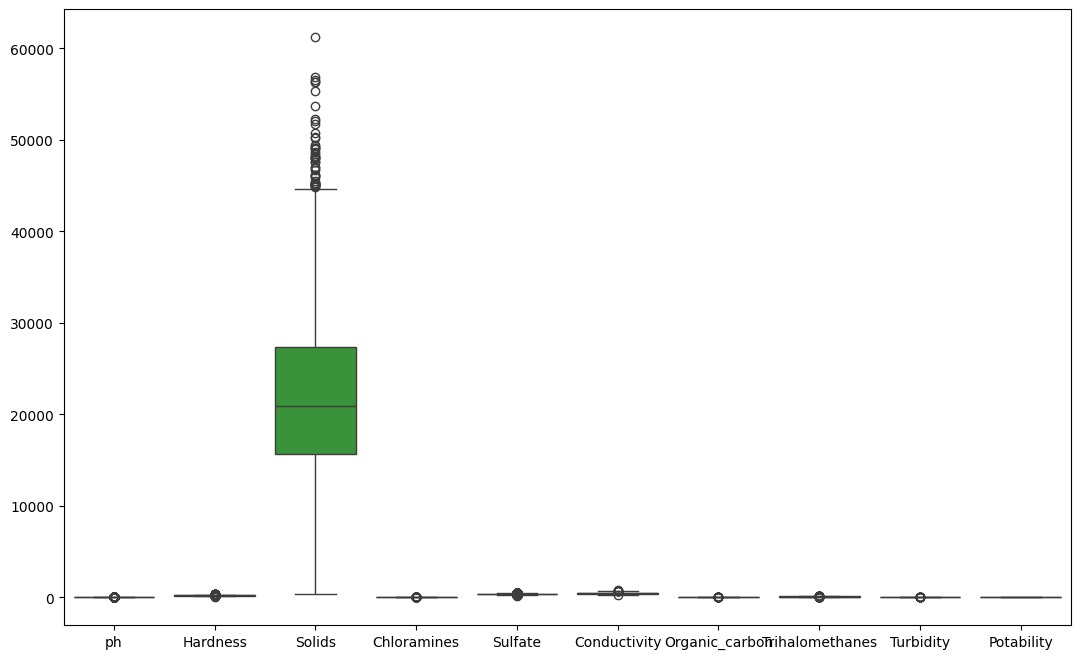

In [ ]:
plt.figure(figsize = (13,8))
sns.boxplot(df)
plt.show()

# The solid columns contains the outliers

In [ ]:
# Seperating target and feature varibales
X = df.drop(columns='Potability')
Y = df['Potability']

In [ ]:
X

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,7.036752,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135
1,3.716080,129.422921,18630.057858,6.635246,333.073546,592.885359,15.180013,56.329076,4.500656
2,8.099124,224.236259,19909.541732,9.275884,333.073546,418.606213,16.868637,66.420093,3.055934
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075
...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821
3272,7.808856,193.553212,17329.802160,8.061362,333.073546,392.449580,19.903225,66.622485,2.798243
3273,9.419510,175.762646,33155.578218,7.350233,333.073546,432.044783,11.039070,69.845400,3.298875
3274,5.126763,230.603758,11983.869376,6.303357,333.073546,402.883113,11.168946,77.488213,4.708658


In [ ]:
Y

0       0
1       0
2       0
3       0
4       0
       ..
3271    1
3272    1
3273    1
3274    1
3275    1
Name: Potability, Length: 3276, dtype: int64

# Splitting training and testing data

In [ ]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.2, random_state=42)

# For classification we use Logistics regression and random forest alogorthm

In [ ]:
# USe of logistics regression
# Training model with trainning data

In [ ]:
model1 = LogisticRegression()
model1.fit(X_train,Y_train)

LogisticRegression()

**Evaluation on test data**

In [ ]:
y_pred = model1.predict(X_test)

**Check Accuracy**

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix, precision_score, recall_score,f1_score,ConfusionMatrixDisplay
acc1 = accuracy_score(Y_test,y_pred)
acc1

0.6280487804878049

In [ ]:
# using random forest classifier
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier()
model2.fit(X_train,Y_train)


RandomForestClassifier()

**Evaluation on test data**

In [ ]:
y_pred2 = model2.predict(X_test)

**Accuracy check**

In [ ]:
acc2 = accuracy_score(Y_test,y_pred2)
acc2

0.6798780487804879

# From above two models, we get better accuracy from random forest classifier.
# It gives 68.75% accuracy.


In [ ]:
# param_dist = {'n_estimators': randint(50,500),
#               'max_depth': randint(1,20)}


# rf = RandomForestClassifier()

# # Use random search to find the best hyperparameters
# rand_search = RandomizedSearchCV(rf,
#                                  param_distributions = param_dist,
#                                  n_iter=5,
#                                  cv=5)

# # Fit the random search object to the data
# rand_search.fit(X_train, y_train)

In [ ]:
# # Create a variable for the best model
# best_rf = rand_search.best_estimator_

# # Print the best hyperparameters
# print('Best hyperparameters:',  rand_search.best_params_)

In [ ]:
# Generate predictions with the best model
# y_pred3= best_rf.predict(X_test)
# accuracy = accuracy_score(Y_test,y_pred3)
# accuracy

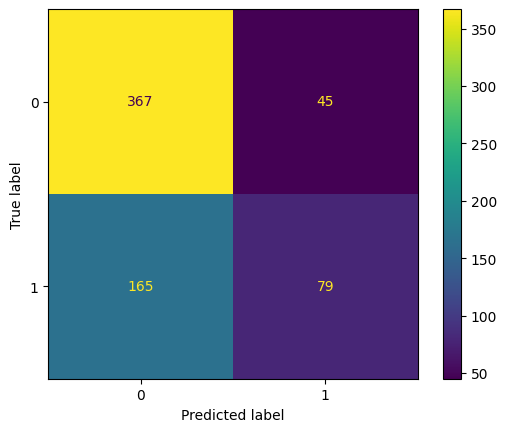

In [ ]:
#Confusion matrxi
cm = confusion_matrix(y_test, y_pred2)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

# Evaluation metrics

In [ ]:
accuracy = accuracy_score(Y_test, y_pred2)
precision = precision_score(Y_test, y_pred2)
recall = recall_score(Y_test, y_pred2)
f1_score = f1_score(Y_test, y_pred2)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1_score:", f1_score)

Accuracy: 0.6798780487804879
Precision: 0.6370967741935484
Recall: 0.3237704918032787
F1_score: 0.4293478260869565


# To see the predidected output value

In [ ]:
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.036752,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.073546,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.073546,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,333.073546,392.449580,19.903225,66.622485,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,333.073546,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,333.073546,402.883113,11.168946,77.488213,4.708658,1


In [ ]:
target = model2.predict([[4.5,230,11222,6.69,330,403,11,77,4]])
target

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1])

In [ ]:
target = model2.predict([[9,181,17222,6.69,330,403,11,77,4]])
target

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0])